In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salary-data-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1228819%2F2051101%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T120006Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D65fc6fc696e39321bd710ce4a9592c8f49c26367c44cd427114ea8f633b89fe87a42b81f50c6cb9d4ca9c1a03b9f2414796156c8f9a44366ebfed47c68b5539bb341f4c8daf401b21e54375086ec4d693547e720c732c1b986cd5ee613082ef447f8eb51f1d12f40d8cb3f9b28e6d67c2b1b67d85549351f744a1a50091204d8e2b98311595c8ecf754cea97add4bffffd27a514caaf0b3028455cf3c73b1cb853e18499d2f247c83c24c9082e7e04e85af47b514972068086f357f14fc725ca10b1720393fca1790cfd885a65b75c725100bb656c8106fbca0aaf190d7bb23c6246ab9ebc61b02199bd8248373f2db6a6e5d526e939f5adcfd9b42bfd9d6c85'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Reading dataset
df=pd.read_csv('../input/salary-data-prediction/Salary_Data.csv')

***Viewing the dataset***

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


***Visualization***

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-1.8350000000000009, 0.5, 'Salary')

<Figure size 864x432 with 0 Axes>

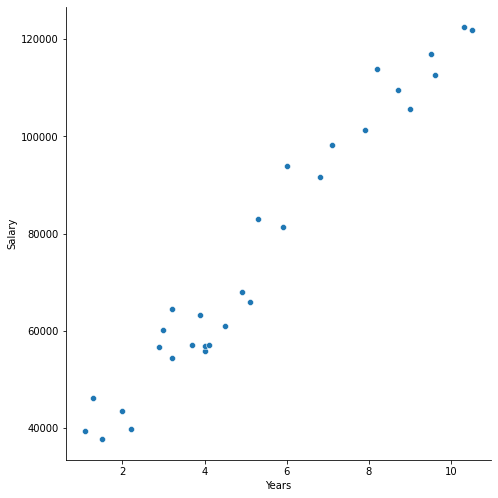

In [ ]:
#Showing how the variables are scattered
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

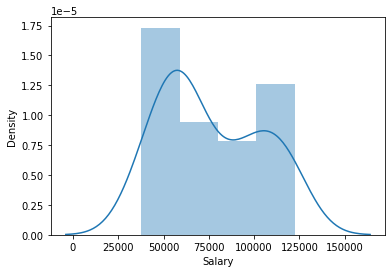

In [ ]:
sns.distplot(df["Salary"])

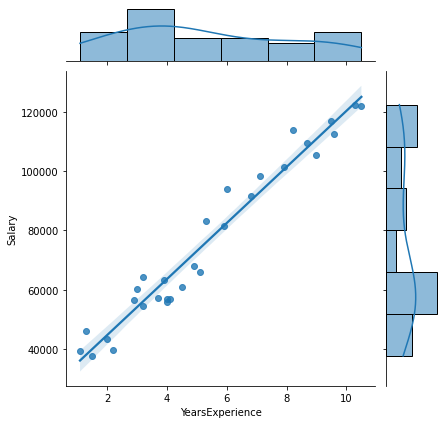

In [ ]:
#Showing a regression line
sns.jointplot(x="YearsExperience", y="Salary", kind="reg", data=df)

In [ ]:
#Checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

***Defining X data & Y data***

In [ ]:
X=df['YearsExperience']
Y=df['Salary']

# ***Simple Linear Regression***

In [ ]:
#Importing segregating data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, train_size=0.7,random_state=100)

In [ ]:
#Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Importing the model
from sklearn.linear_model import LinearRegression

In [ ]:
#Fitting data to the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicting the Salary for the test values
y_predict = lr.predict(X_test)
y_predict

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

***Let,s check this with an example.
Assume that an employee has 3.4 years of experience and we want to predict salary.***

In [ ]:
lr.predict([[3.4]])

array([58288.98083619])

*The predicted salary for an employee with 3.4 years is approximately 58289.*

**Analyzing the prediction**

Text(0.5, 1.0, 'Actual vs. Predicted')

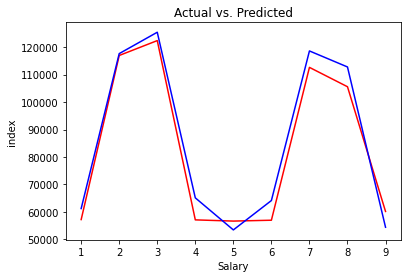

In [ ]:
#Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_predict,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Actual vs. Predicted')

Text(0.5, 1.0, 'Error Value')

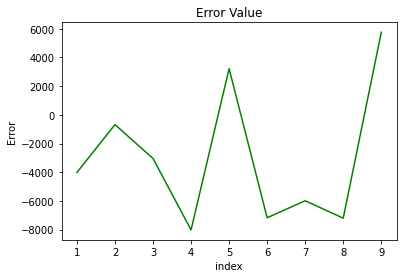

In [ ]:
#Plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_predict,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')

In [ ]:
#Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]


# Then it is said to form a line with
# y = 25202.8 + 9731.2x